In [1]:
import sys
sys.path.append('/Users/sohaib/Documents/RLQC/RL_1q_state_prep/')

import gym
import gym.spaces
import numpy as np
from pyquil import get_qc, Program
from pyquil.api import WavefunctionSimulator
from pyquil.gates import *
from envs.oneqenv_wfnsim import OneQEnv
from collections import defaultdict
import pickle
from RLexpts_utils import policy_evaluation, policy_improvement, policy_iteration

In [2]:
# specify a few constants across all environments
goal_angles = np.array([np.pi, 0.0])
gates = [I(0), H(0), S(0), T(0)]
bins = (16, 32)

In [3]:
env = OneQEnv(goal_angles=goal_angles, gates=gates, bins=bins)
print(f"No. of states: {env.nS}")

No. of states: 450


In [4]:
# size_expt = 10000
size_expt = 100000
d_raw_counts = defaultdict(lambda: [])

for expt in range(size_expt):
    print(f"\rExperiment {expt+1} / {size_expt}", end="")
    sys.stdout.flush()
    u = np.random.uniform(0.0, 1.0, size=2)
    theta = np.arccos(2 * u[0] - 1)
    phi = 2 * np.pi * u[1]
    angles = [theta, phi]

    for a in range(env.nA):
        env.reset()
        env.polar_angles_to_prog(angles)   # sets env._program
        s = env.polar_angles_to_state(angles)    # sets nothing; returns state number
        next_s, reward, done, info = env.step(a)
        d_raw_counts[s, a] += [next_s]

Experiment 100000 / 100000

In [5]:
optimal_policy = policy_iteration(env, d_raw_counts, gamma=0.95)
# pickle.dump(optimal_policy, open(f'optpol_1q_clifft_bins16_runs10000.p', 'wb'))
pickle.dump(optimal_policy, open(f'optpol_1q_clifft_bins16_runs100000.p', 'wb'))

Counter for policy evaluation: 361

In [6]:
d_optimal_prog = {}

for s in range(env.nS):
    
    optimal_progs = []
    
    for i in range(100):

        converged = False

        while not converged:

            original_state = env.reset(s)
            original_angles = env.state_to_polar_angles(s)
            original_wfn = env.wfn_sim.wavefunction(env._program)

            state = s
            prog = Program()
            done = False
            counter = 0
#             converged = False

            while not done:
                action = np.argmax(optimal_policy[state])
                prog += env._actions[action]
                next_state, reward, done, info = env.step(action)
                state = next_state
                counter += 1
                if counter > 50:
                    break

            if done:
                converged = True
                optimal_progs.append(prog)
    
    # find the min length program
    prog_lengths = [len(p) for p in optimal_progs]
    optimal_progs = [p for p in optimal_progs if len(p) == min(prog_lengths)]
    d_optimal_prog[s] = optimal_progs[0]   # just pick the first of the min length programs
    print(f"original state: {s}")
    print("Optimal Program:\n")
    print(d_optimal_prog[s])
    print("*" * 30)

original state: 0
Optimal Program:

H 0
S 0
S 0
H 0

******************************
original state: 1
Optimal Program:

T 0
H 0
S 0
S 0
H 0

******************************
original state: 2
Optimal Program:

H 0
S 0
S 0
H 0

******************************
original state: 3
Optimal Program:

H 0
S 0
S 0
H 0

******************************
original state: 4
Optimal Program:

H 0
S 0
S 0
H 0

******************************
original state: 5
Optimal Program:

H 0
S 0
S 0
H 0

******************************
original state: 6
Optimal Program:

S 0
H 0
S 0
S 0
H 0

******************************
original state: 7
Optimal Program:

S 0
H 0
S 0
S 0
H 0

******************************
original state: 8
Optimal Program:

T 0
H 0
S 0
S 0
H 0

******************************
original state: 9
Optimal Program:

T 0
H 0
S 0
S 0
H 0

******************************
original state: 10
Optimal Program:

T 0
H 0
S 0
S 0
H 0

******************************
original state: 11
Optimal Program:

S 0
H 0
S 0
S 

KeyboardInterrupt: 

Using older version

In [7]:
d_optimal_prog = {}

for s in range(env.nS):
    
    converged = False

    while not converged:

        original_state = env.reset(s)
        original_angles = env.state_to_polar_angles(s)
        original_wfn = env.wfn_sim.wavefunction(env._program)

        state = s
        prog = Program()
        done = False
        counter = 0
        converged = False

        while not done:
            action = np.argmax(optimal_policy[state])
            prog += env._actions[action]
            next_state, reward, done, info = env.step(action)
            state = next_state
            counter += 1
            if counter > 50:
                break
                
        if done:
            converged = True
            print(f"original state: {original_state}")
            print(f"Polar angles: {original_angles}")
            print(f"Original wavefunction: {original_wfn}")
            print("\n")
            d_optimal_prog[s] = prog
            print("Optimal program")
            print(prog)
            print("Final wavefunction")
            print(env._wfn)
            print("Final outcome probabilities")
            print(env._wfn.get_outcome_probs())
            print("*" * 30)

original state: 0
Polar angles: (0.0, 0.0)
Original wavefunction: (1+0j)|0>


Optimal program
H 0
S 0
S 0
H 0

Final wavefunction
(1+0j)|1>
Final outcome probabilities
{'0': 0.0, '1': 0.9999999999999996}
******************************
original state: 1
Polar angles: (0.19634954084936207, 0.1646265386401534)
Original wavefunction: (0.9870780992-0.057294276j)|0> + (0.1493954352+0.0086715563j)|1>


Optimal program
T 0
H 0
S 0
T 0
H 0
S 0
S 0
T 0
H 0
T 0
H 0
T 0
H 0

Final wavefunction
(0.0150329016-0.0141829136j)|0> + (-0.1932027047+0.9809411663j)|1>
Final outcome probabilities
{'0': 0.0004271431670447049, '1': 0.9995728568329547}
******************************
original state: 2
Polar angles: (0.2357349930598186, 0.19634954084936207)
Original wavefunction: (0.9888519495-0.1120913121j)|0> + (0.0973934162+0.0110400306j)|1>


Optimal program
H 0
S 0
S 0
H 0

Final wavefunction
(0.0973934162+0.0110400306j)|0> + (0.9888519495-0.1120913121j)|1>
Final outcome probabilities
{'0': 0.00960735979838

original state: 21
Polar angles: (0.19839202282601004, 4.069098317986903)
Original wavefunction: (-0.4107502893-0.9014129439j)|0> + (-0.0567619996+0.1245671702j)|1>


Optimal program
H 0
S 0
T 0
S 0
H 0
T 0
H 0
T 0
H 0
T 0
H 0

Final wavefunction
(0.021275887+0.0177907435j)|0> + (-0.8195462138-0.5723415323j)|1>
Final outcome probabilities
{'0': 0.0007691739196039987, '1': 0.9992308260803957}
******************************
original state: 22
Polar angles: (0.19634954084936207, 4.276375358143484)
Original wavefunction: (-0.4850298401-0.8577187461j)|0> + (-0.083918076+0.1483993374j)|1>


Optimal program
H 0
S 0
T 0
S 0
H 0
T 0
H 0
T 0
H 0
T 0
H 0

Final wavefunction
(-0.0202182248+0.0136767441j)|0> + (-0.8645908174-0.5018833415j)|1>
Final outcome probabilities
{'0': 0.000595829942484708, '1': 0.999404170057514}
******************************
original state: 23
Polar angles: (0.36553123679430716, 4.463469097367166)
Original wavefunction: (-0.5764799024-0.8079318429j)|0> + (-0.0709397056+0.

original state: 47
Polar angles: (0.5196047476977936, 2.748893571891069)
Original wavefunction: (0.1900425383-0.9610028461j)|0> + (0.0389724265+0.1970748927j)|1>


Optimal program
H 0
T 0
H 0
T 0
H 0
S 0
T 0
H 0

Final wavefunction
(0.0573098379-0.0492430527j)|0> + (0.2920707719-0.9534072417j)|1>
Final outcome probabilities
{'0': 0.005709295755038709, '1': 0.9942907042449602}
******************************
original state: 48
Polar angles: (0.3980883769045625, 3.1287273508721842)
Original wavefunction: (0.0937404899-0.9610268052j)|0> + (0.0252486343+0.2588488106j)|1>


Optimal program
H 0
T 0
H 0
T 0
H 0
S 0
T 0
H 0

Final wavefunction
(-0.0143398949-0.021174049j)|0> + (0.2097297561-0.9774249109j)|1>
Final outcome probabilities
{'0': 0.0006539729379871565, '1': 0.9993460270620119}
******************************
original state: 49
Polar angles: (0.41076407857903896, 3.2751727780947792)
Original wavefunction: (-0.0209057729-0.9677900844j)|0> + (-0.0054183295+0.2508305063j)|1>


Optimal pr

original state: 71
Polar angles: (0.6718004092233267, 1.2924258610736805)
Original wavefunction: (0.7436332414-0.5664218517j)|0> + (0.2825758016+0.2152366245j)|1>


Optimal program
H 0
S 0
S 0
T 0
H 0

Final wavefunction
(0.0737380958-0.0622430302j)|0> + (0.9524709472-0.288942197j)|1>
Final outcome probabilities
{'0': 0.009311501582407088, '1': 0.9906884984175923}
******************************
original state: 72
Polar angles: (0.6884934400851878, 1.5554246138957322)
Original wavefunction: (0.7187696305-0.6262168308j)|0> + (0.227725908+0.1984026458j)|1>


Optimal program
H 0
S 0
S 0
T 0
H 0

Final wavefunction
(0.0080905843-0.0959702536j)|0> + (0.9384049542-0.3318439314j)|1>
Final outcome probabilities
{'0': 0.009275747136814448, '1': 0.9907242528631852}
******************************
original state: 73
Polar angles: (0.6676361749663445, 1.7246111149317782)
Original wavefunction: (0.6481361809-0.6931748959j)|0> + (0.2153582582+0.2303234145j)|1>


Optimal program
H 0
S 0
T 0
S 0
H 0

Fi

original state: 93
Polar angles: (0.6598588453492242, 5.608895389817809)
Original wavefunction: (-0.8785531587-0.31752089j)|0> + (-0.3355817163+0.1212837313j)|1>


Optimal program
S 0
T 0
H 0
S 0
T 0
S 0
H 0

Final wavefunction
(0.0026349188+0.0419473966j)|0> + (-0.7296565191-0.6825209427j)|1>
Final outcome probabilities
{'0': 0.001766526880111659, '1': 0.9982334731198879}
******************************
original state: 94
Polar angles: (0.6850558544115857, 5.831338823060312)
Original wavefunction: (-0.9057942712-0.2575461635j)|0> + (-0.3236342371+0.0920195223j)|1>


Optimal program
T 0
S 0
H 0
S 0
T 0
S 0
H 0

Final wavefunction
(0.0199984671+0.0895643163j)|0> + (-0.7620164029-0.6410220716j)|1>
Final outcome probabilities
{'0': 0.008421705437738314, '1': 0.9915782945622613}
******************************
original state: 95
Polar angles: (0.7000739966267908, 5.952790626232299)
Original wavefunction: (-0.9294989657-0.117677103j)|0> + (-0.3467798647+0.0439032762j)|1>


Optimal program
S 0

original state: 114
Polar angles: (0.9436451160033472, 3.3527786721253765)
Original wavefunction: (-0.0994651249-0.9025061531j)|0> + (-0.0459037425+0.4165119194j)|1>


Optimal program
H 0
S 0
H 0
T 0
H 0
S 0
H 0

Final wavefunction
(-0.0894377625+0.0056352965j)|0> + (0.3114114981-0.946040173j)|1>
Final outcome probabilities
{'0': 0.008030869920753955, '1': 0.9919691300792454}
******************************
original state: 115
Polar angles: (0.7853981633974483, 3.6630618358984766)
Original wavefunction: (-0.2513495439-0.8890313815j)|0> + (-0.10411239+0.3682488556j)|1>


Optimal program
T 0
H 0
S 0
T 0
H 0

Final wavefunction
(0.0584496559+0.0584496559j)|0> + (-0.6438090397-0.7607083514j)|1>
Final outcome probabilities
{'0': 0.006832724539961573, '1': 0.9931672754600379}
******************************
original state: 116
Polar angles: (0.9676114811617231, 3.8091725057072647)
Original wavefunction: (-0.2890969026-0.8631625627j)|0> + (-0.1314727254+0.3925408179j)|1>


Optimal program
T 0
H

original state: 135
Polar angles: (1.1553282142542107, 1.3060663134941932)
Original wavefunction: (0.693949657-0.4856142617j)|0> + (0.435558928+0.3047967891j)|1>


Optimal program
T 0
S 0
H 0
S 0
S 0
T 0
H 0
T 0
H 0

Final wavefunction
(-0.0433462433+0.0759132729j)|0> + (-0.733903738-0.6736049151j)|1>
Final outcome probabilities
{'0': 0.007641721814867667, '1': 0.9923582781851322}
******************************
original state: 136
Polar angles: (1.047851482664641, 1.3744467859455345)
Original wavefunction: (0.6020012764-0.5935190802j)|0> + (0.3803801897+0.375020634j)|1>


Optimal program
S 0
T 0
H 0
T 0
H 0
T 0
H 0
S 0
H 0

Final wavefunction
(-0.033799453-0.0719906293j)|0> + (0.6144316907-0.7849513639j)|1>
Final outcome probabilities
{'0': 0.006325053733161844, '1': 0.9936749462668372}
******************************
original state: 137
Polar angles: (1.0634696491910032, 1.706655895552606)
Original wavefunction: (0.5689928479-0.6338553309j)|0> + (0.3499705758+0.3898655597j)|1>


Optima

original state: 158
Polar angles: (1.136850823322115, 5.799140808645915)
Original wavefunction: (-0.8328960293-0.2241586692j)|0> + (-0.4886147768+0.1315016932j)|1>


Optimal program
H 0
T 0
H 0
S 0
S 0
T 0
H 0

Final wavefunction
(-0.0314214642+0.0240755496j)|0> + (-0.8973382333-0.4395647331j)|1>
Final outcome probabilities
{'0': 0.0015669404994945839, '1': 0.9984330595005045}
******************************
original state: 159
Polar angles: (1.1504587834683124, 6.003528068367322)
Original wavefunction: (-0.8557256383-0.1452035417j)|0> + (-0.4896392201+0.0830842804j)|1>


Optimal program
T 0
H 0
S 0
T 0
H 0
S 0
T 0
S 0
H 0

Final wavefunction
(-0.0022378085+0.0718126365j)|0> + (-0.7349759663-0.6742761055j)|1>
Final outcome probabilities
{'0': 0.0051620625455132026, '1': 0.994837937454486}
******************************
original state: 160
Polar angles: (1.0230981698504211, 6.244309260740456)
Original wavefunction: (-0.878463975-0.0651185687j)|0> + (-0.4720552391+0.0349923986j)|1>


Opti

original state: 180
Polar angles: (1.3090128928185012, 3.736366297270491)
Original wavefunction: (-0.2404564131-0.7909218058j)|0> + (-0.1636732956+0.5383627614j)|1>


Optimal program
H 0
T 0
H 0
T 0
H 0
S 0
H 0

Final wavefunction
(-0.0239263915+0.0709046949j)|0> + (-0.4535429345-0.8880871909j)|1>
Final outcome probabilities
{'0': 0.005599947966705033, '1': 0.9944000520332937}
******************************
original state: 181
Polar angles: (1.2720763311442997, 4.082180888617223)
Original wavefunction: (-0.3614254457-0.7401237736j)|0> + (-0.2488412228+0.5095748157j)|1>


Optimal program
H 0
S 0
H 0
T 0
H 0
T 0
H 0

Final wavefunction
(-0.0038836876+0.0819348036j)|0> + (-0.2922905432-0.9528052494j)|1>
Final outcome probabilities
{'0': 0.006728395076310821, '1': 0.9932716049236884}
******************************
original state: 182
Polar angles: (1.2818312557697504, 4.123340357836604)
Original wavefunction: (-0.4005681194-0.6854807984j)|0> + (-0.3067547869+0.5249407181j)|1>


Optimal pro

original state: 202
Polar angles: (1.399404313137691, 1.7721271855552065)
Original wavefunction: (0.4293857115-0.6260029424j)|0> + (0.3682098466+0.5368144332j)|1>


Optimal program
S 0
T 0
H 0
T 0
S 0
H 0
S 0
T 0
H 0
T 0
H 0

Final wavefunction
(0.0175568073-0.0530284871j)|0> + (0.269581771+0.961356025j)|1>
Final outcome probabilities
{'0': 0.0031202619221884693, '1': 0.9968797380778108}
******************************
original state: 203
Polar angles: (1.3813747895676458, 1.9791864409497646)
Original wavefunction: (0.4074391673-0.6569158896j)|0> + (0.3343766831+0.5391169379j)|1>


Optimal program
H 0
S 0
S 0
T 0
H 0
T 0
H 0
T 0
H 0

Final wavefunction
(0.0370624912-0.0201118992j)|0> + (0.7870886253+0.6153969282j)|1>
Final outcome probabilities
{'0': 0.0017781167380742546, '1': 0.9982218832619252}
******************************
original state: 204
Polar angles: (1.500527823550393, 2.292545728289079)
Original wavefunction: (0.332701497-0.6771351074j)|0> + (0.2894397492+0.5890860649j)|1>


original state: 225
Polar angles: (1.5891661032103401, 0.011438430497264463)
Original wavefunction: (0.7024414412-0.0317009674j)|0> + (0.7103122356+0.032056174j)|1>


Optimal program
S 0
S 0
H 0

Final wavefunction
(-0.0055654921-0.045083107j)|0> + (0.998967705+0.000251169j)|1>
Final outcome probabilities
{'0': 0.002063461241905109, '1': 0.9979365387580947}
******************************
original state: 226
Polar angles: (1.7015454737343494, 0.3573574755579739)
Original wavefunction: (0.67585975-0.0884623027j)|0> + (0.7255138464+0.0949614553j)|1>


Optimal program
S 0
T 0
S 0
H 0
T 0
H 0
T 0
H 0
T 0
H 0

Final wavefunction
(0.034208184+0.0168555822j)|0> + (0.8670957351-0.4966796509j)|1>
Final outcome probabilities
{'0': 0.0014543105074002582, '1': 0.9985456894925987}
******************************
original state: 227
Polar angles: (1.6819983092901356, 0.5699788169608146)
Original wavefunction: (0.6770295108-0.1789008654j)|0> + (0.6901909407+0.182378692j)|1>


Optimal program
S 0
H 0
S 

original state: 246
Polar angles: (1.6273253211356022, 4.155002118663504)
Original wavefunction: (-0.3129683311-0.5726278874j)|0> + (-0.3633984652+0.6648982492j)|1>


Optimal program
H 0
T 0
H 0
T 0
H 0
T 0
H 0

Final wavefunction
(0.0197531795+0.0034797596j)|0> + (-0.7930926129-0.6087707372j)|1>
Final outcome probabilities
{'0': 0.0004022968267233145, '1': 0.999597703173276}
******************************
original state: 247
Polar angles: (1.6349184248801414, 4.357894960364395)
Original wavefunction: (-0.3760641204-0.5421379065j)|0> + (-0.4282951226+0.617434657j)|1>


Optimal program
H 0
T 0
H 0
T 0
H 0
T 0
H 0

Final wavefunction
(-0.0833001707-0.0193820699j)|0> + (-0.7812338322-0.6183519357j)|1>
Final outcome probabilities
{'0': 0.007314583073918575, '1': 0.9926854169260804}
******************************
original state: 248
Polar angles: (1.6632013807906798, 4.59877813226542)
Original wavefunction: (-0.4487323845-0.5251834676j)|0> + (-0.4697034627+0.549727414j)|1>


Optimal program

original state: 268
Polar angles: (1.8577597087187827, 2.1678732976662802)
Original wavefunction: (0.2582361561-0.5086111451j)|0> + (0.3718432683+0.7323669672j)|1>


Optimal program
S 0
H 0
S 0
T 0
H 0
T 0
H 0

Final wavefunction
(0.0707226261-0.0446026775j)|0> + (-0.4610580927+0.8834219527j)|1>
Final outcome probabilities
{'0': 0.0069910886868077985, '1': 0.9930089113131917}
******************************
original state: 269
Polar angles: (1.7755971228458618, 2.399668508290481)
Original wavefunction: (0.2065657289-0.5261981784j)|0> + (0.3014276239+0.7678459899j)|1>


Optimal program
H 0
T 0
H 0
T 0
H 0

Final wavefunction
(0.0884710226-0.040842077j)|0> + (0.8703256586-0.4827401484j)|1>
Final outcome probabilities
{'0': 0.009495197100238464, '1': 0.9905048028997606}
******************************
original state: 270
Polar angles: (1.9502312732830989, 2.5838577090840684)
Original wavefunction: (0.1699675639-0.5664011525j)|0> + (0.2317799357+0.772385152j)|1>


Optimal program
S 0
H 0
T 0

KeyboardInterrupt: 

Verify that older version \~ newer version with loop over only a single convergence

In [9]:
d_optimal_prog = {}

for s in range(env.nS):
    
    optimal_progs = []
    
#     for i in range(100):
    for i in range(1):

        converged = False

        while not converged:

            original_state = env.reset(s)
            original_angles = env.state_to_polar_angles(s)
            original_wfn = env.wfn_sim.wavefunction(env._program)

            state = s
            prog = Program()
            done = False
            counter = 0
#             converged = False

            while not done:
                action = np.argmax(optimal_policy[state])
                prog += env._actions[action]
                next_state, reward, done, info = env.step(action)
                state = next_state
                counter += 1
                if counter > 50:
                    break

            if done:
                converged = True
                optimal_progs.append(prog)
    
    # find the min length program
    prog_lengths = [len(p) for p in optimal_progs]
    optimal_progs = [p for p in optimal_progs if len(p) == min(prog_lengths)]
    d_optimal_prog[s] = optimal_progs[0]   # just pick the first of the min length programs
    print(f"original state: {s}")
    print("Optimal Program:\n")
    print(d_optimal_prog[s])
    print("*" * 30)

original state: 0
Optimal Program:

H 0
S 0
S 0
H 0

******************************
original state: 1
Optimal Program:

T 0
H 0
S 0
T 0
H 0
S 0
S 0
T 0
H 0
T 0
H 0
T 0
H 0

******************************
original state: 2
Optimal Program:

H 0
S 0
S 0
H 0

******************************
original state: 3
Optimal Program:

H 0
S 0
S 0
H 0

******************************
original state: 4
Optimal Program:

H 0
S 0
S 0
H 0

******************************
original state: 5
Optimal Program:

H 0
S 0
T 0
H 0
S 0
S 0
T 0
H 0
T 0
H 0
T 0
H 0

******************************
original state: 6
Optimal Program:

S 0
H 0
S 0
S 0
H 0

******************************
original state: 7
Optimal Program:

S 0
H 0
T 0
H 0
T 0
H 0
S 0
T 0
H 0

******************************
original state: 8
Optimal Program:

T 0
H 0
S 0
T 0
H 0
S 0
T 0
H 0
T 0
H 0
S 0
T 0
H 0

******************************
original state: 9
Optimal Program:

T 0
H 0
S 0
S 0
H 0

******************************
original state: 10
Optimal P

original state: 79
Optimal Program:

S 0
H 0
S 0
T 0
H 0

******************************
original state: 80
Optimal Program:

S 0
H 0
S 0
T 0
H 0

******************************
original state: 81
Optimal Program:

S 0
H 0
S 0
T 0
H 0

******************************
original state: 82
Optimal Program:

S 0
H 0
S 0
H 0
T 0
H 0
T 0
S 0
H 0
S 0
T 0
H 0

******************************
original state: 83
Optimal Program:

T 0
H 0
S 0
H 0
S 0
T 0
H 0
T 0
H 0
S 0
T 0
H 0

******************************
original state: 84
Optimal Program:

T 0
H 0
S 0
T 0
H 0

******************************
original state: 85
Optimal Program:

T 0
H 0
S 0
T 0
H 0

******************************
original state: 86
Optimal Program:

T 0
H 0
S 0
T 0
H 0

******************************
original state: 87
Optimal Program:

H 0
S 0
T 0
H 0

******************************
original state: 88
Optimal Program:

H 0
S 0
T 0
H 0

******************************
original state: 89
Optimal Program:

H 0
S 0
T 0
H 0

********

original state: 164
Optimal Program:

H 0
S 0
T 0
H 0
S 0
S 0
T 0
H 0

******************************
original state: 165
Optimal Program:

H 0
S 0
H 0
T 0
S 0
H 0
S 0
T 0
S 0
H 0

******************************
original state: 166
Optimal Program:

H 0
T 0
H 0
T 0
H 0
S 0
T 0
S 0
H 0

******************************
original state: 167
Optimal Program:

T 0
H 0
T 0
H 0
S 0
T 0
H 0
S 0
T 0
H 0

******************************
original state: 168
Optimal Program:

T 0
H 0
S 0
H 0
T 0
H 0
S 0
T 0
H 0

******************************
original state: 169
Optimal Program:

T 0
H 0
T 0
S 0
S 0
S 0
H 0
T 0
H 0

******************************
original state: 170
Optimal Program:

S 0
T 0
H 0
S 0
T 0
H 0
S 0
T 0
H 0
T 0
H 0

******************************
original state: 171
Optimal Program:

H 0
S 0
S 0
T 0
H 0
T 0
H 0
T 0
H 0

******************************
original state: 172
Optimal Program:

H 0
S 0
H 0
T 0
H 0
S 0
T 0
H 0

******************************
original state: 173
Optimal Program:



original state: 247
Optimal Program:

H 0
T 0
H 0
T 0
H 0
T 0
H 0

******************************
original state: 248
Optimal Program:

H 0
S 0
H 0

******************************
original state: 249
Optimal Program:

H 0
S 0
H 0

******************************
original state: 250
Optimal Program:

H 0
T 0
H 0
S 0
T 0
S 0
S 0
H 0
T 0
H 0

******************************
original state: 251
Optimal Program:

H 0
T 0
H 0
S 0
H 0
T 0
H 0
T 0
S 0
H 0

******************************
original state: 252
Optimal Program:

S 0
S 0
T 0
H 0

******************************
original state: 253
Optimal Program:

S 0
T 0
S 0
H 0

******************************
original state: 254
Optimal Program:

H 0
S 0
H 0
T 0
S 0
H 0
T 0
H 0
T 0
H 0

******************************
original state: 255
Optimal Program:

S 0
T 0
H 0
S 0
T 0
H 0
T 0
H 0
S 0
T 0
H 0

******************************
original state: 256
Optimal Program:

S 0
S 0
H 0

******************************
original state: 257
Optimal Program:

T 

KeyboardInterrupt: 

### V optimal

In [10]:
V_optimal = policy_evaluation(env, optimal_policy, d_raw_counts)

Counter for policy evaluation: 84

In [11]:
min_V = min(V_optimal)
max_V = max(V_optimal)

In [12]:
V_optimal_rescaled = (V_optimal - min_V) / (max_V - min_V)
print(min(V_optimal_rescaled))
print(max(V_optimal_rescaled))

0.0
1.0


In [14]:
V_optimal_rescaled

array([3.66689533e-01, 6.46773593e-02, 5.79965346e-02, 6.38138418e-02,
       1.17879456e-01, 1.04143952e-01, 4.99269227e-02, 3.33329827e-02,
       7.21442373e-02, 7.49434383e-02, 4.99269227e-02, 4.24250195e-02,
       1.14575008e-01, 1.15867875e-01, 8.38783655e-02, 6.31359403e-02,
       4.60801173e-02, 5.49847317e-02, 6.11236188e-02, 7.43080020e-02,
       8.31853032e-02, 9.08399705e-02, 5.18051225e-02, 1.57347453e-02,
       7.80437224e-02, 6.82737795e-02, 1.41465398e-02, 2.20813952e-02,
       1.19024365e-01, 1.07481860e-01, 7.45787067e-02, 6.78501465e-02,
       7.71277962e-02, 2.60450173e-02, 2.50662698e-02, 2.47485802e-02,
       2.65411195e-02, 2.30148547e-02, 4.12797813e-02, 5.25638662e-02,
       5.46765104e-02, 5.02382809e-02, 4.95376838e-02, 5.23622563e-02,
       5.45074222e-02, 5.02382809e-02, 7.29778472e-02, 8.71745449e-02,
       8.99076860e-02, 8.42675635e-02, 8.34743960e-02, 7.14178882e-02,
       4.24104396e-02, 0.00000000e+00, 1.39137603e-04, 5.49331748e-03,
      

In [15]:
V_optimal

array([2.08388061, 0.69324586, 0.66248357, 0.68926974, 0.93821839,
       0.87497236, 0.62532651, 0.54891863, 0.72762759, 0.74051669,
       0.62532651, 0.59078351, 0.92300284, 0.92895593, 0.78165815,
       0.6861483 , 0.60761365, 0.64861552, 0.67688243, 0.73759078,
       0.77846689, 0.81371331, 0.63397481, 0.4678864 , 0.75479215,
       0.70980581, 0.46057341, 0.49710996, 0.94349019, 0.89034198,
       0.73883726, 0.70785517, 0.75057471, 0.51536072, 0.51085401,
       0.50939119, 0.51764506, 0.50140814, 0.58551019, 0.63746849,
       0.6471963 , 0.62676018, 0.62353424, 0.63654016, 0.64641772,
       0.62676018, 0.731466  , 0.79683562, 0.80942054, 0.78345023,
       0.77979804, 0.72428306, 0.59071638, 0.39543474, 0.39607541,
       0.42072908, 0.42321284, 0.42321791, 0.42262232, 0.41389669,
       0.41407372, 0.42293306, 0.46797407, 0.51007185, 0.51741406,
       1.34098606, 0.9058    , 0.90216803, 1.27753734, 1.34098606,
       0.90986586, 1.12462217, 1.59420245, 1.67623259, 1.13346

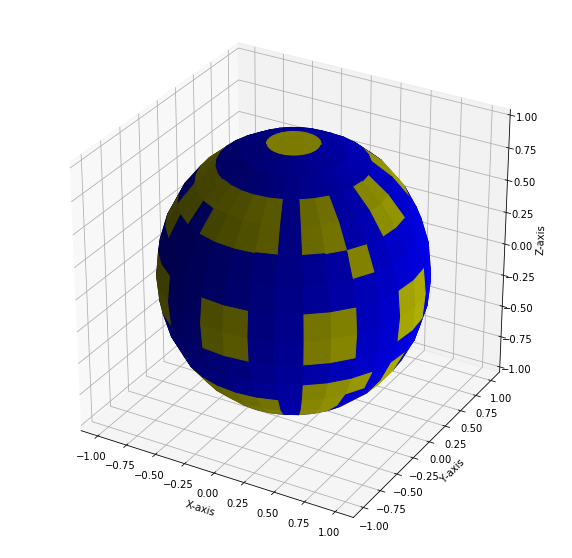

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

r = 1.0

# # following the logic of grid creation
# bins = (16, 32)
# create grid for angles
low=[0.0, 0.0]
high=[np.pi, 2 * np.pi]
grid_list = []
for i in range(len(low)):
    tmp_high = high[i]
    tmp_low = low[i]
    tmp_bin = bins[i]
    tmp_diff = (tmp_high - tmp_low) / tmp_bin
    tmp_arr = np.linspace(tmp_low + tmp_diff, tmp_high - tmp_diff, tmp_bin - 1)
    grid_list.append(tmp_arr)
    
# grid_list
t = [0] + grid_list[0].tolist() + [np.pi]
p = [0] + grid_list[1].tolist() + [2 * np.pi]

lent = len(t)
lenp = len(p)

# Figure out how to do the following: TODO
colors = np.empty((lent, lenp), dtype=str)

for y, yval in enumerate(p):
    for x, xval in enumerate(t):
#         state = env.polar_angles_to_state((xval, yval), grid_list, bins)
        state = b((xval, yval))

#         val = V_optimal_rescaled[state]
#         colors[x, y] = val

        val = V_optimal[state]
        if val >= 1.0:
            colors[x, y] = 'y'
        elif val < 1.0:
            colors[x, y] = 'b'
        else:
            raise ValueError('unknown val')

phi, theta = np.meshgrid(p, t)

x = r*np.cos(phi)*np.sin(theta)
y = r*np.sin(phi)*np.sin(theta)
z = r*np.cos(theta)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, facecolors=colors)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# plt.title('Optimal values for various states on the Bloch sphere')
plt.show()

In [31]:
env.polar_angles_to_state([np.pi/2, 0.0])

225